In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_median_aucpr_by_model_and_scenario(csv_path):
    # Wczytaj dane z pliku CSV
    df = pd.read_csv(csv_path)

    # Grupowanie po modelu i scenariuszu, a następnie obliczenie mediany auc-PR
    median_aucpr = df.groupby(['model', 'scenario'])['auc-PR'].median().reset_index()

    # Tworzenie wykresu
    plt.figure(figsize=(12, 6))
    for model in median_aucpr['model'].unique():
        subset = median_aucpr[median_aucpr['model'] == model]
        plt.plot(subset['scenario'], subset['auc-PR'], marker='o', label=model)

    plt.title('Mediana AUC-PR dla każdego modelu w zależności od scenariusza')
    plt.xlabel('Scenariusz')
    plt.ylabel('Mediana AUC-PR')
    plt.xticks(rotation=45)
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()


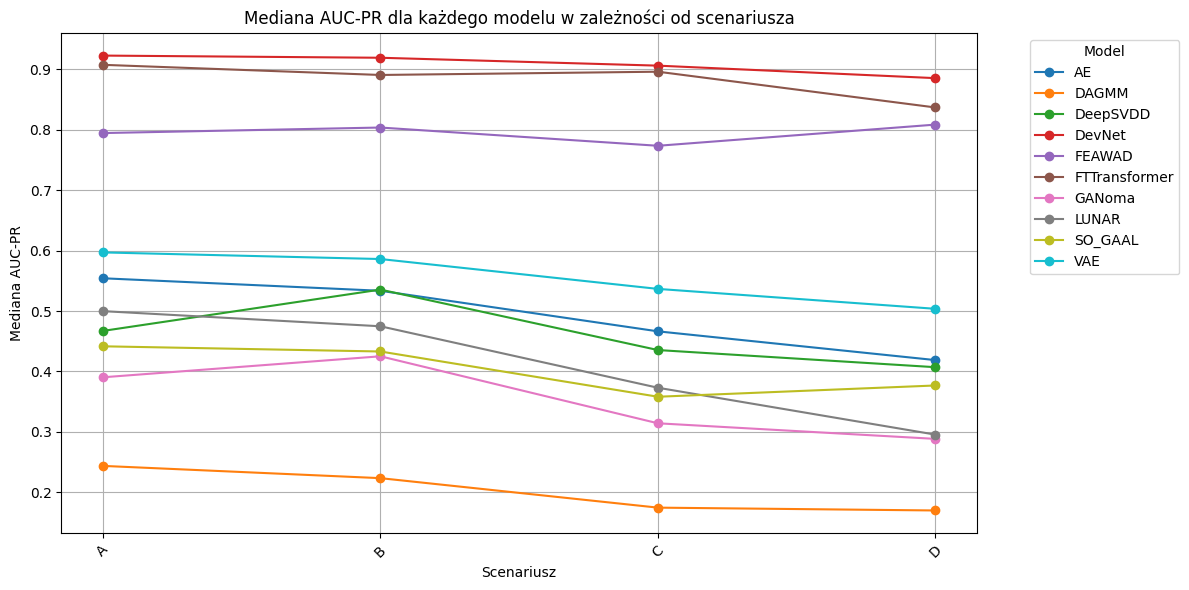

In [2]:
plot_median_aucpr_by_model_and_scenario('experiment2_results.csv')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_median_aucpr_by_model_and_scenario_per_dataset(csv_path):
    # Load CSV
    df = pd.read_csv(csv_path)

    # Group by model, scenario, and dataset; calculate median auc-PR
    median_aucpr = df.groupby(['dataset', 'model', 'scenario'])['auc-PR'].median().reset_index()

    # Iterate through each dataset and plot
    for dataset_name in median_aucpr['dataset'].unique():
        subset = median_aucpr[median_aucpr['dataset'] == dataset_name]

        plt.figure(figsize=(12, 6))
        for model in subset['model'].unique():
            model_data = subset[subset['model'] == model]
            # Sort scenarios for consistent line plotting
            model_data = model_data.sort_values('scenario')
            plt.plot(model_data['scenario'], model_data['auc-PR'], marker='o', label=model)

        plt.title(f'Median AUC-PR per Scenario - {dataset_name}')
        plt.xlabel('Scenario')
        plt.ylabel('Median AUC-PR')
        plt.xticks(rotation=45)
        plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


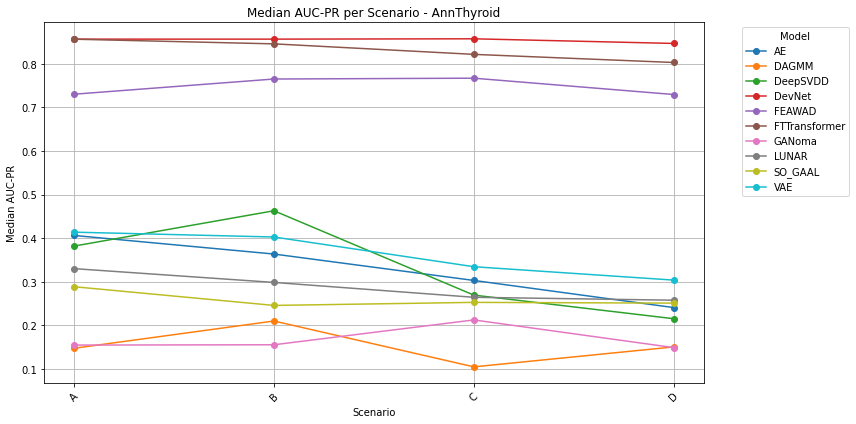

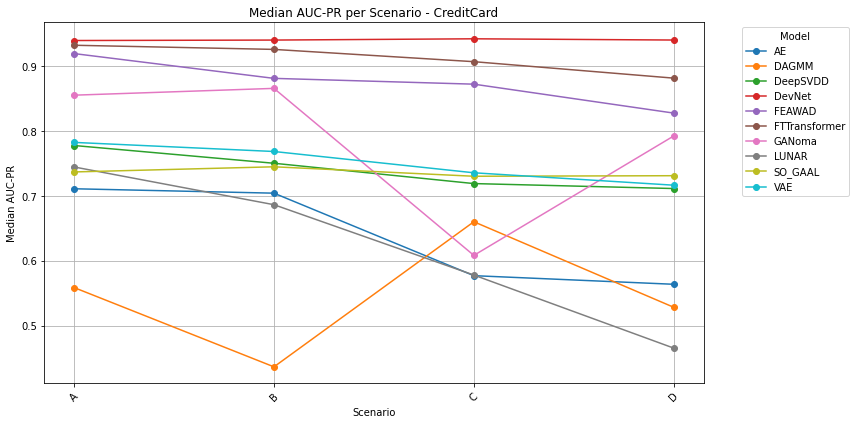

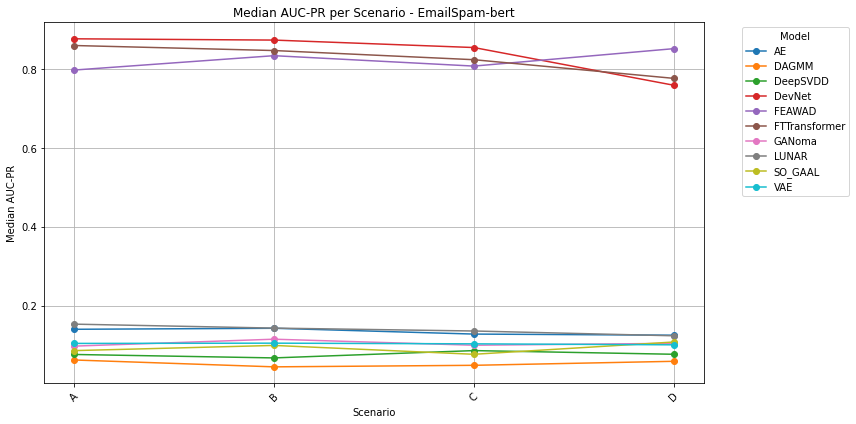

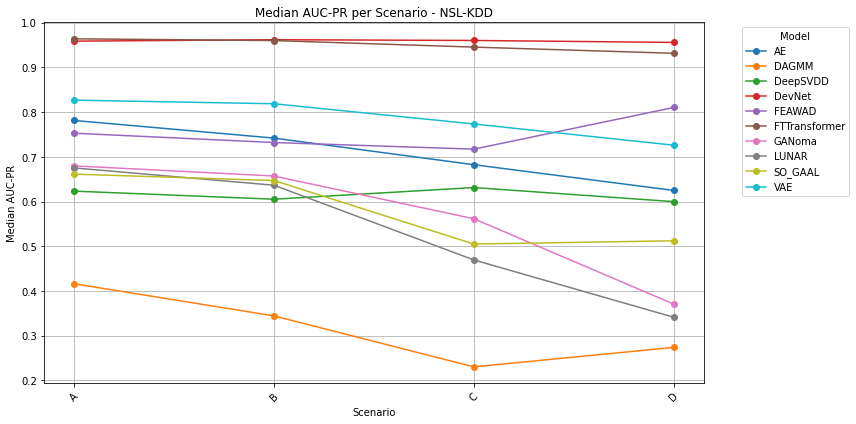

In [3]:
plot_median_aucpr_by_model_and_scenario_per_dataset("experiment2_results.csv")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots_aucpr_by_scenario_for_each_model(csv_path):
    # Wczytanie danych
    df = pd.read_csv(csv_path)

    # Tworzenie wykresów boxplotów dla każdego modelu
    models = df['model'].unique()
    
    for model in models:
        plt.figure(figsize=(10, 6))
        model_data = df[df['model'] == model]
        
        sns.boxplot(data=model_data, x='scenario', y='auc-PR')
        plt.title(f'AUC-PR Boxploty według scenariusza dla modelu: {model}')
        plt.xlabel('Scenariusz')
        plt.ylabel('AUC-PR')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


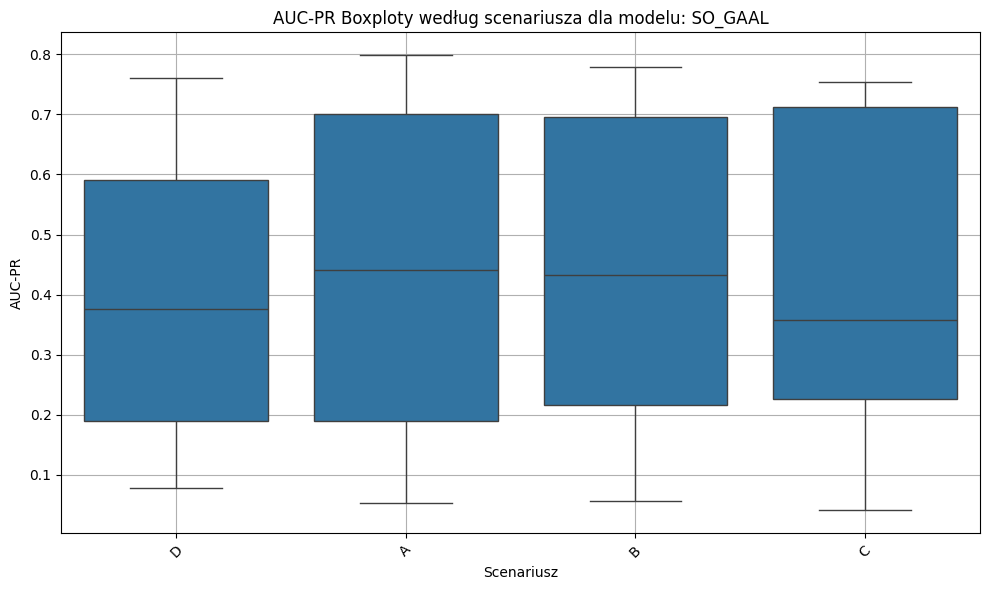

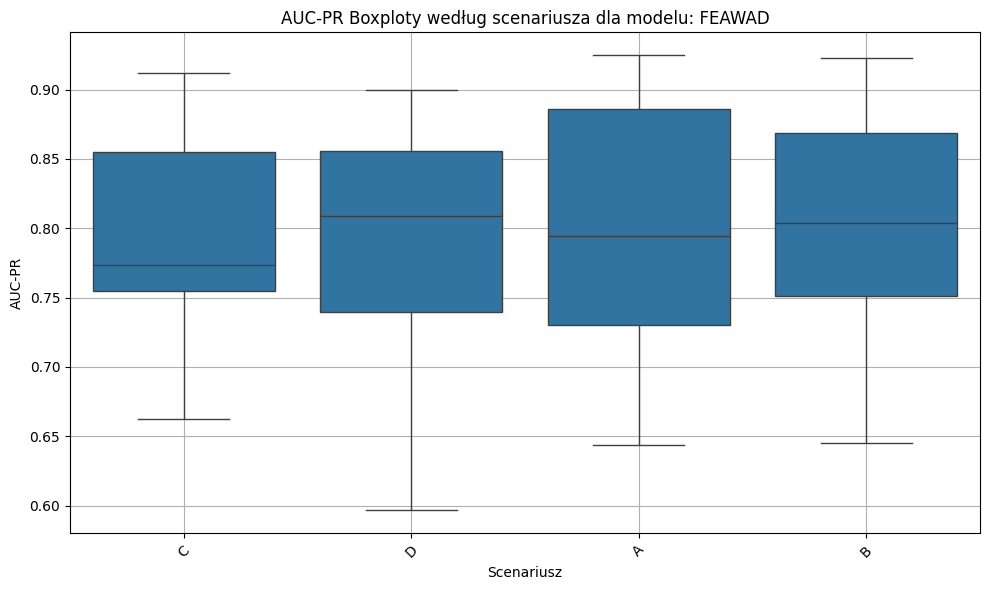

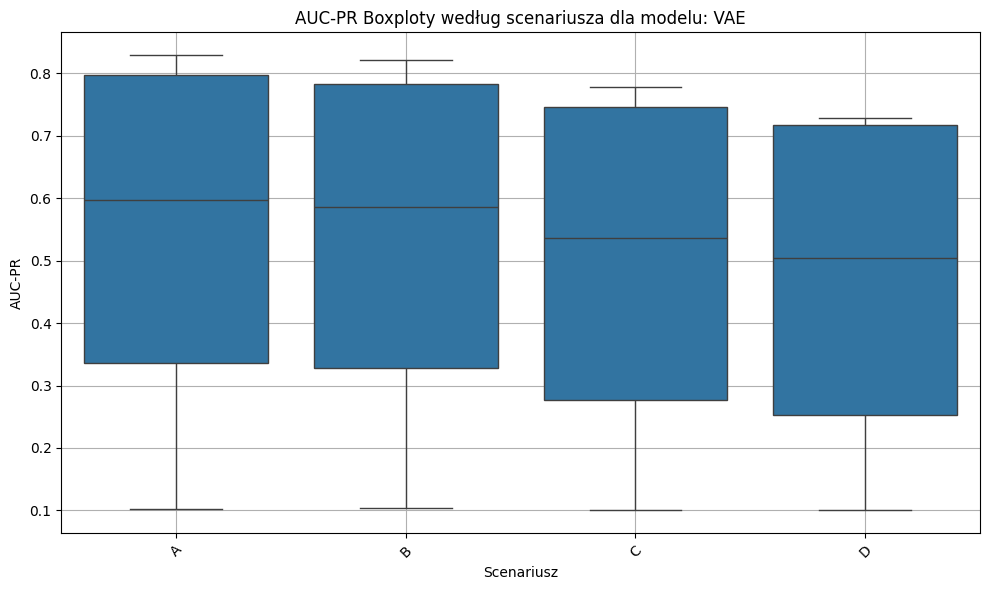

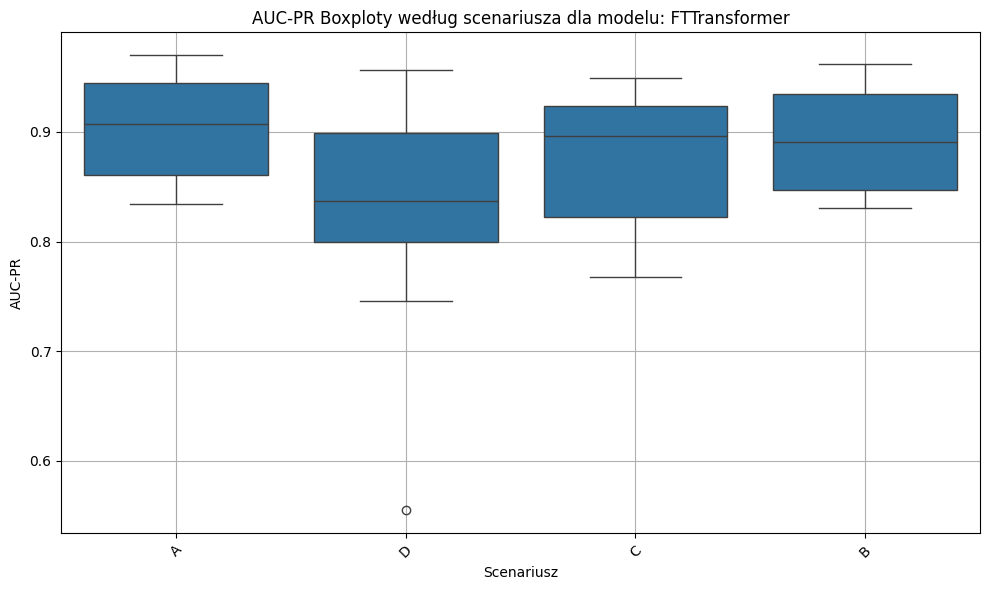

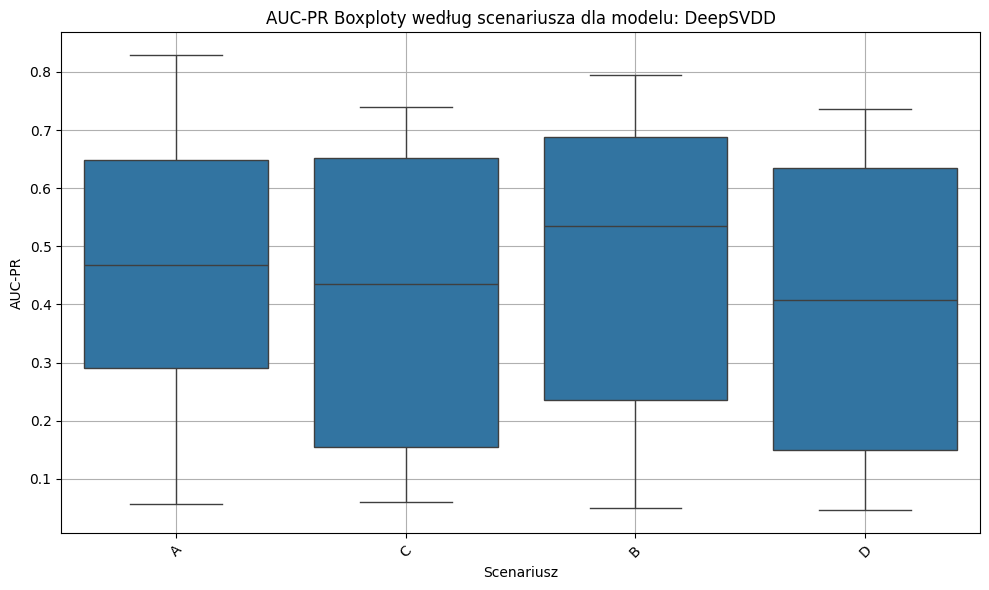

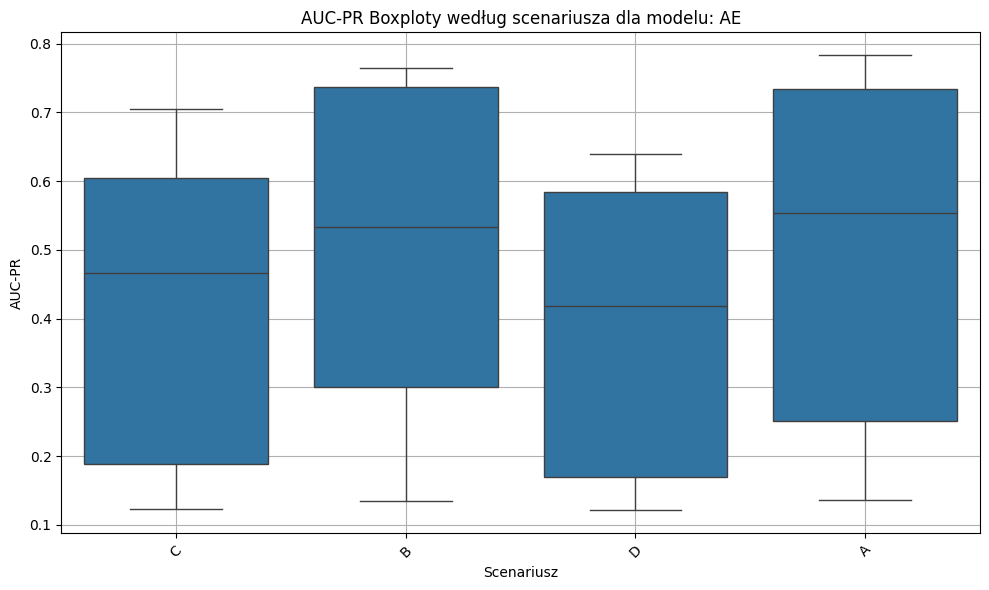

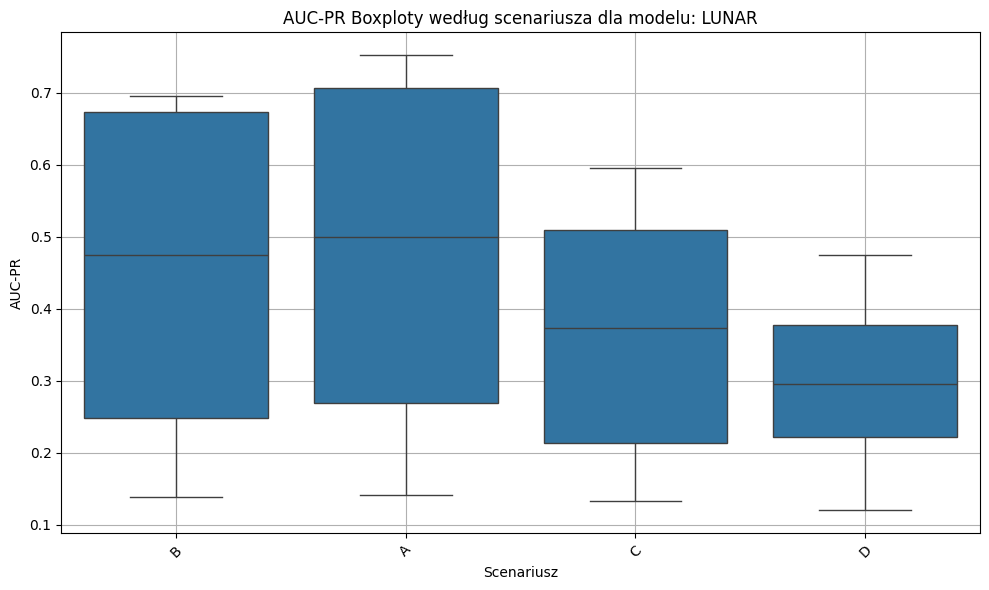

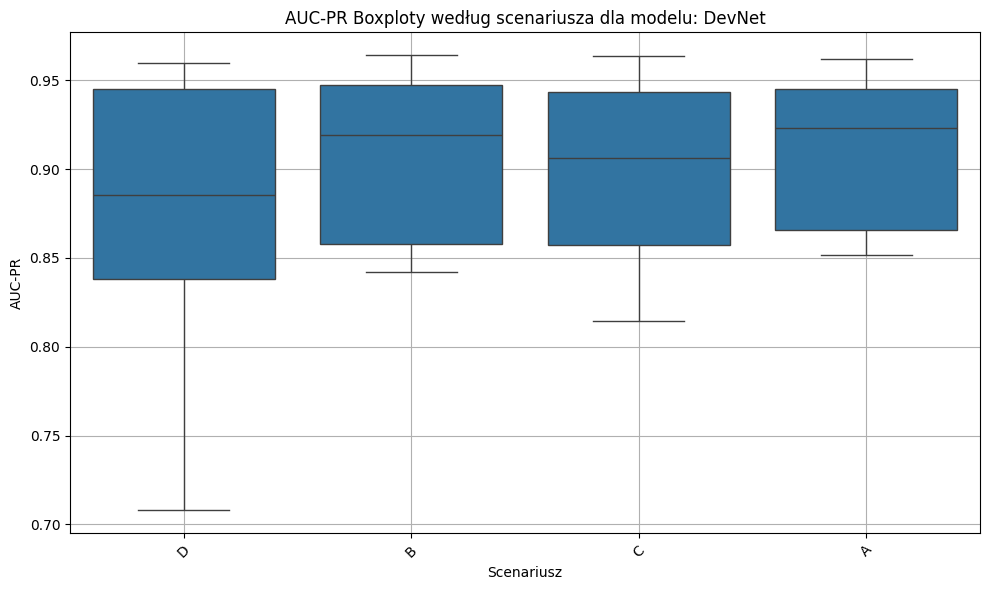

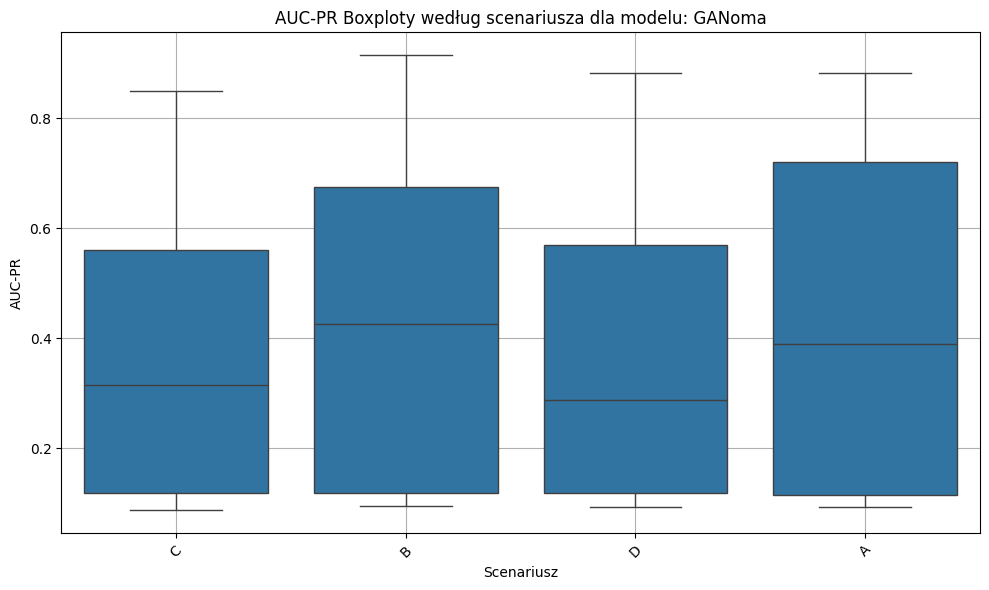

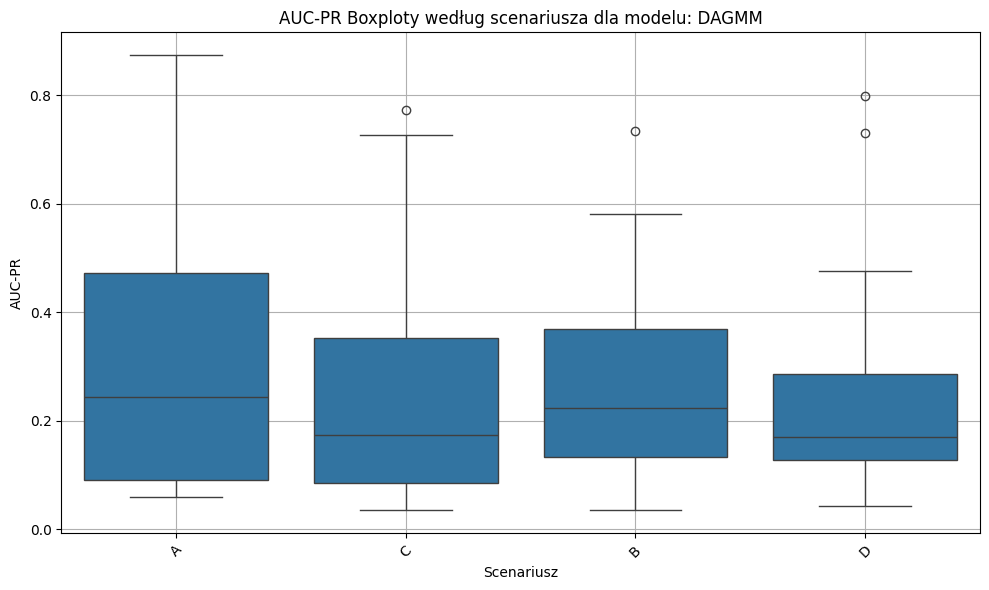

In [4]:
plot_boxplots_aucpr_by_scenario_for_each_model('experiment2_results.csv')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots_aucpr_by_scenario_per_dataset(csv_path):
    # Load the data
    df = pd.read_csv(csv_path)

    # Get unique datasets
    datasets = df['dataset'].unique()

    # Sort scenario labels alphabetically
    scenario_order = sorted(df['scenario'].unique())

    # Create a boxplot for each dataset
    for dataset in datasets:
        plt.figure(figsize=(10, 6))
        dataset_df = df[df['dataset'] == dataset]

        # Boxplot: scenario on x-axis, auc-PR on y-axis, one box per model per scenario
        sns.boxplot(
            data=dataset_df,
            x='scenario',
            y='auc-PR',
            hue='model',
            order=scenario_order  # Enforce alphabetical order
        )

        plt.title(f'AUC-PR Boxplots by Scenario for Dataset: {dataset}')
        plt.xlabel('Scenario')
        plt.ylabel('AUC-PR')
        plt.xticks(rotation=45)
        plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


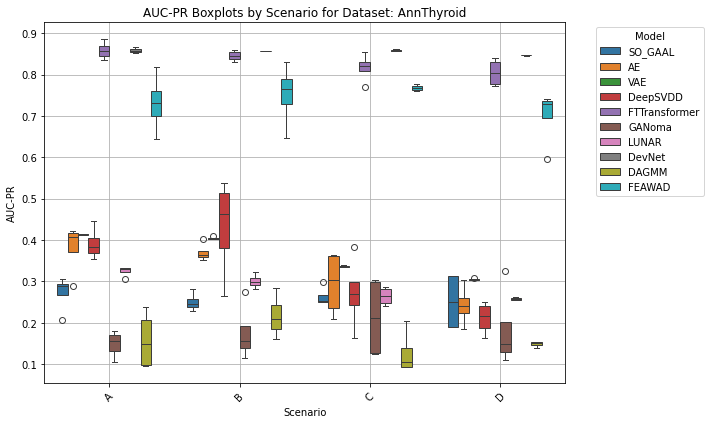

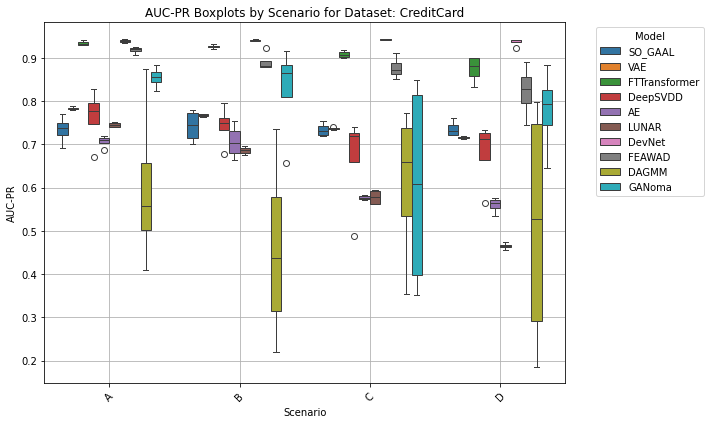

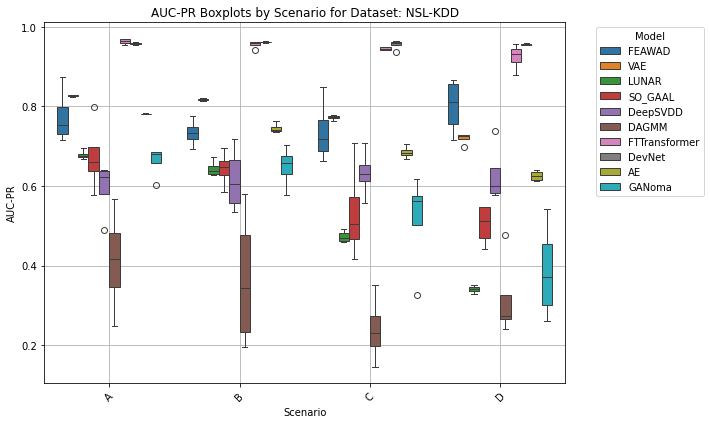

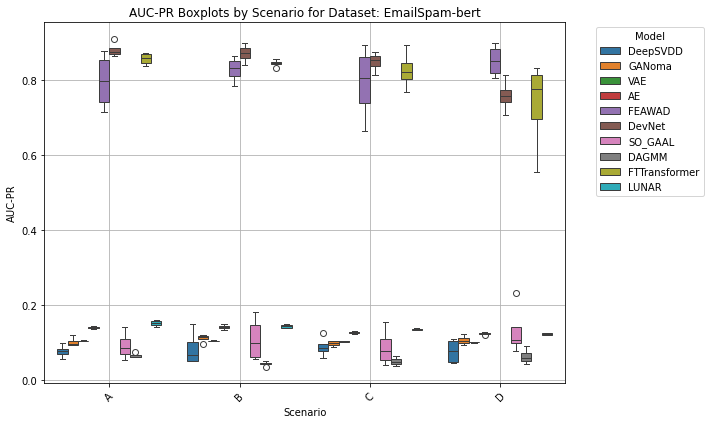

In [7]:
plot_boxplots_aucpr_by_scenario_per_dataset("experiment2_results.csv")
